In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv('/content/Language Detection.csv')
print (df)

                                                    Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]


In [ ]:
df.shape

(10337, 2)

In [ ]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
X = df["Text"]
y = df["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
df_list = []

In [ ]:
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()

    df_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_list).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)
results=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
results.head(5)


,Actual,Predictions
0,0,0
1,4,4
2,15,15
3,1,1
4,12,12


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.9772727272727273
[[ 99   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  85   0   3   0   0   0   0   1   0   0   0   0   0   3   0   0]
 [  0   0 121   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 271   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 199   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0  74   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  13   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0 140   0   0   0   0   1   0   0   0]
 [  0   1   0   6   0   0   0   0   0  81   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0 114   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0 125   0   1   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0 125   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0   2   0 172 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.99      0.92      0.96        92
           2       0.99      0.98      0.98       124
           3       0.89      1.00      0.94       271
           4       0.99      0.99      0.99       200
           5       1.00      0.99      0.99        85
           6       1.00      0.99      0.99        75
           7       1.00      1.00      1.00        13
           8       0.99      0.98      0.99       143
           9       1.00      0.92      0.96        88
          10       1.00      0.98      0.99       116
          11       0.98      0.98      0.98       127
          12       1.00      0.98      0.99       128
          13       0.98      0.98      0.98       176
          14       0.97      0.99      0.98       143
          15       1.00      0.98      0.99        94
          16       1.00      0.92      0.96        91

    accuracy              

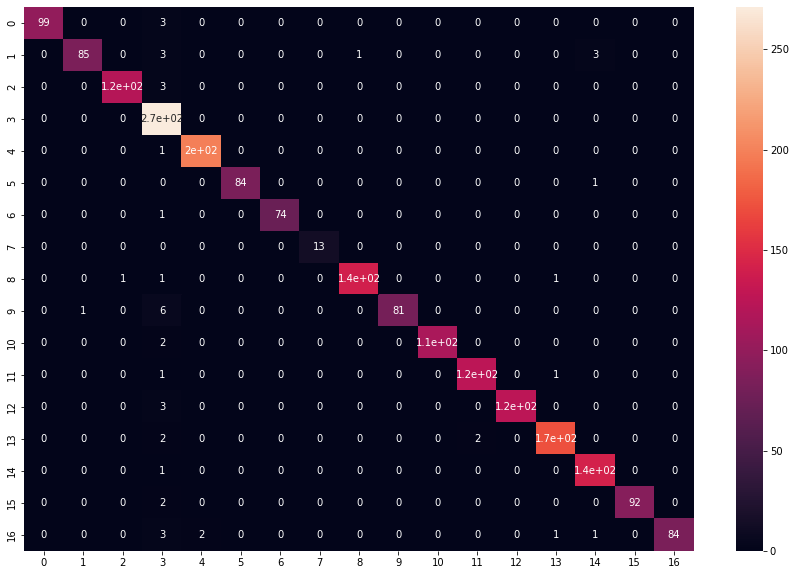

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()


In [ ]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
y_pred=classifier.predict(x_test)
results=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
results.head(5)

,Actual,Predictions
0,0,0
1,4,4
2,15,15
3,1,1
4,12,12


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 88,   0,   0,   0,   0,   0,   0,   0,   0,  14,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  66,   1,   1,   0,   0,   0,   0,   2,   9,   0,   3,   0,
          1,   9,   0,   0],
       [  0,   3,  99,   4,   6,   0,   0,   0,   3,   3,   0,   0,   0,
          5,   0,   0,   1],
       [  0,   0,   3, 242,   3,   0,   1,   0,   6,  11,   0,   1,   0,
          4,   0,   0,   0],
       [  0,   0,   2,   2, 167,   0,   0,   0,   7,   6,   0,   1,   0,
         13,   0,   0,   2],
       [  0,   1,   0,   0,   0,  77,   0,   0,   0,   3,   0,   0,   0,
          0,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0,  66,   0,   0,   9,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  10,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   5,   2,   0,   0,   0, 127,   4,   0,   1,   0,
          3,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87,   0,   0,   0,
         

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       102
           1       0.89      0.72      0.80        92
           2       0.94      0.80      0.86       124
           3       0.92      0.89      0.91       271
           4       0.86      0.83      0.85       200
           5       0.94      0.91      0.92        85
           6       0.99      0.88      0.93        75
           7       1.00      0.77      0.87        13
           8       0.77      0.89      0.82       143
           9       0.40      0.99      0.57        88
          10       1.00      0.89      0.94       116
          11       0.86      0.77      0.81       127
          12       1.00      0.83      0.91       128
          13       0.77      0.72      0.75       176
          14       0.90      0.90      0.90       143
          15       1.00      0.93      0.96        94
          16       0.88      0.80      0.84        91

    accuracy              

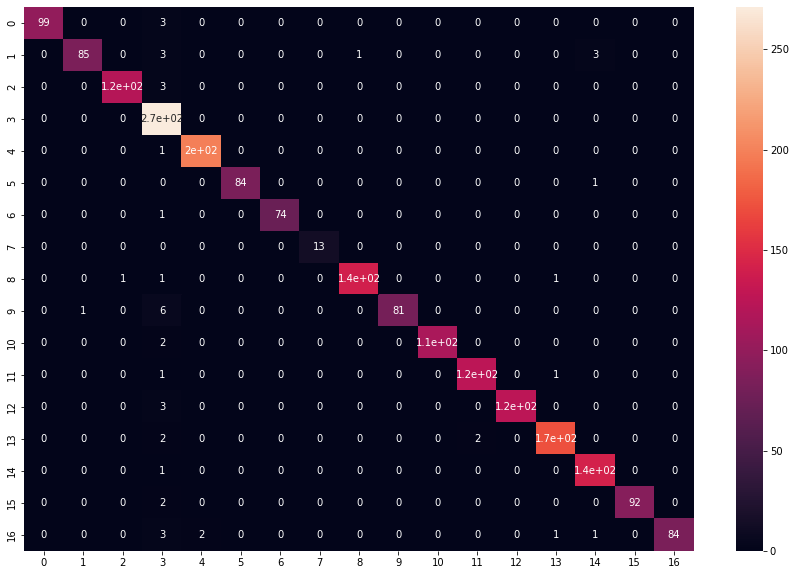

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)


In [ ]:
rf.fit(x_train,y_train)
y_pred1 = rf.predict(x_test)

In [ ]:
y_pred1=rf.predict(x_test)
results=pd.DataFrame({'Actual':y_test,'Predictions':y_pred1})
results.head(5)

,Actual,Predictions
0,0,0
1,4,4
2,15,15
3,1,1
4,12,12


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 88,   0,   0,   0,   0,   0,   0,   0,   0,  14,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  66,   1,   1,   0,   0,   0,   0,   2,   9,   0,   3,   0,
          1,   9,   0,   0],
       [  0,   3,  99,   4,   6,   0,   0,   0,   3,   3,   0,   0,   0,
          5,   0,   0,   1],
       [  0,   0,   3, 242,   3,   0,   1,   0,   6,  11,   0,   1,   0,
          4,   0,   0,   0],
       [  0,   0,   2,   2, 167,   0,   0,   0,   7,   6,   0,   1,   0,
         13,   0,   0,   2],
       [  0,   1,   0,   0,   0,  77,   0,   0,   0,   3,   0,   0,   0,
          0,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0,  66,   0,   0,   9,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  10,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   5,   2,   0,   0,   0, 127,   4,   0,   1,   0,
          3,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87,   0,   0,   0,
         

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94       102
           1       0.93      0.85      0.89        92
           2       0.98      0.96      0.97       124
           3       0.96      0.96      0.96       271
           4       0.96      0.96      0.96       200
           5       0.95      0.96      0.96        85
           6       1.00      0.96      0.98        75
           7       1.00      0.92      0.96        13
           8       0.90      0.93      0.92       143
           9       0.52      0.99      0.69        88
          10       1.00      0.94      0.97       116
          11       0.96      0.91      0.93       127
          12       1.00      0.88      0.93       128
          13       0.92      0.89      0.91       176
          14       0.99      0.93      0.96       143
          15       1.00      0.96      0.98        94
          16       0.98      0.87      0.92        91

    accuracy              

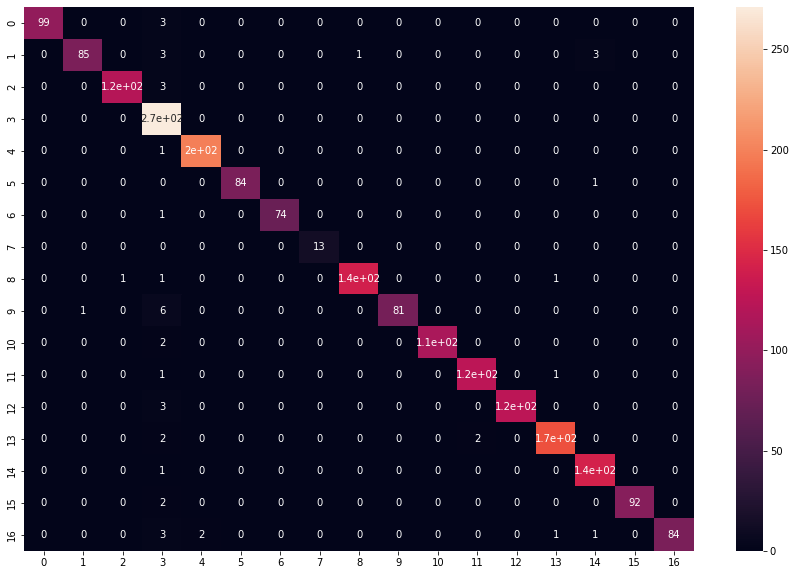

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [ ]:
y_pred=nb.predict(x_test)
results=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
results.tail(5)

,Actual,Predictions
2063,13,13
2064,13,13
2065,10,10
2066,3,3
2067,11,11


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 99,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3,   0],
       [  0,  87,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,
          0,   1,   2,   0],
       [  0,   1, 119,   1,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0],
       [  0,   0,   1, 262,   1,   3,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   2,   1],
       [  0,   1,   2,   0, 194,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   1,   0],
       [  0,   1,   0,   0,   0,  84,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  74,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1,   1,   0,   0,   0,   0, 140,   0,   0,   0,   0,
          0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,  81,   0,   0,   0,
         

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.96      0.95      0.95        92
           2       0.97      0.96      0.96       124
           3       0.98      0.97      0.97       271
           4       0.99      0.97      0.98       200
           5       0.91      0.99      0.95        85
           6       1.00      0.99      0.99        75
           7       1.00      1.00      1.00        13
           8       0.95      0.98      0.96       143
           9       1.00      0.92      0.96        88
          10       0.98      0.98      0.98       116
          11       0.96      0.98      0.97       127
          12       1.00      0.97      0.98       128
          13       0.99      0.94      0.97       176
          14       0.99      0.98      0.98       143
          15       0.80      1.00      0.89        94
          16       0.99      0.95      0.97        91

    accuracy              

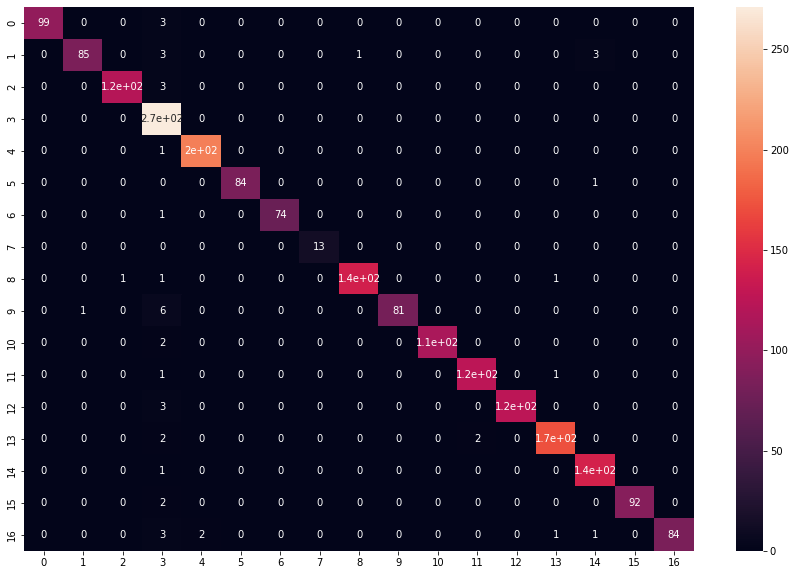

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')


In [ ]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
y_pred=classifier.predict(x_test)
results=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
results.tail(5)

,Actual,Predictions
2063,13,13
2064,13,13
2065,10,10
2066,3,3
2067,11,11


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
          0,   0,   0,   0],
       [  0,  82,   0,   1,   0,   1,   0,   0,   2,   0,   0,   0,   4,
          1,   1,   0,   0],
       [  0,   0, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          1,   0,   0,   0],
       [  0,   0,   0, 265,   0,   0,   0,   0,   1,   0,   0,   0,   3,
          2,   0,   0,   0],
       [  0,   0,   1,   1, 194,   0,   0,   0,   0,   0,   0,   0,   3,
          1,   0,   0,   0],
       [  0,   1,   0,   0,   0,  82,   0,   0,   0,   0,   0,   0,   2,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  72,   0,   0,   0,   0,   0,   3,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0,   0,   2,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0, 137,   0,   0,   2,   1,
          2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  79,   0,   0,   8,
         

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       102
           1       0.98      0.89      0.93        92
           2       0.99      0.97      0.98       124
           3       0.97      0.98      0.98       271
           4       0.99      0.97      0.98       200
           5       0.99      0.96      0.98        85
           6       1.00      0.96      0.98        75
           7       1.00      0.85      0.92        13
           8       0.94      0.96      0.95       143
           9       1.00      0.90      0.95        88
          10       1.00      0.97      0.99       116
          11       0.96      0.94      0.95       127
          12       0.69      0.99      0.81       128
          13       0.95      0.95      0.95       176
          14       0.99      0.97      0.98       143
          15       1.00      0.96      0.98        94
          16       0.99      0.91      0.95        91

    accuracy              

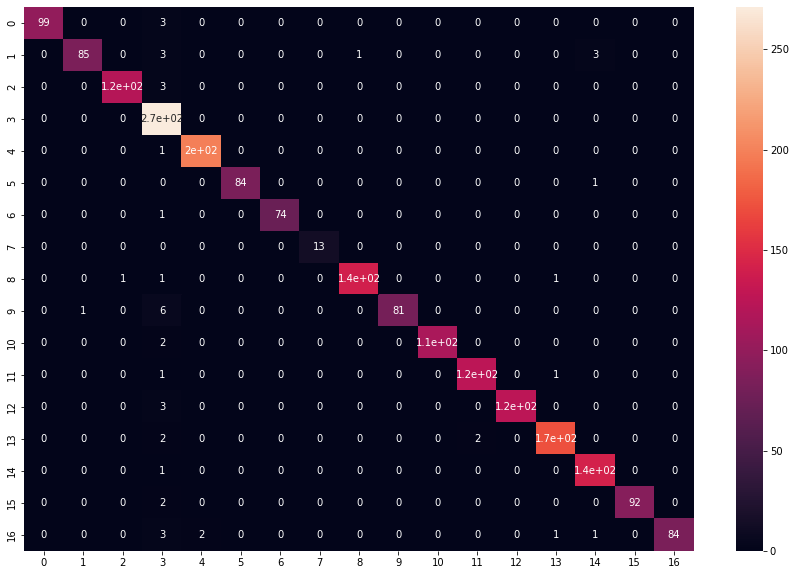

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
vectorizer = TfidfVectorizer()
clf = PassiveAggressiveClassifier()
X_train = []
y_train = []
def incremental_learning(new_X, new_y):
    new_X_vectorized = vectorizer.transform(new_X)
    clf.partial_fit(new_X_vectorized, new_y, classes=[0, 1])
    X_train.extend(new_X)
    y_train.extend(new_y)

# Example data
initial_X = ["I am happy", "I am sad"]
initial_y = [1, 0]

new_X = ["I am excited", "I am angry"]
new_y = [1, 0]

# Perform initial training
initial_X_vectorized = vectorizer.fit_transform(initial_X)
clf.fit(initial_X_vectorized, initial_y)

# Perform incremental learning with new data
incremental_learning(new_X, new_y)

# Make predictions
test_X = ["I am excited", "I am sad"]
test_X_vectorized = vectorizer.transform(test_X)
predictions = clf.predict(test_X_vectorized)

print(predictions)


[1 0]
